# Prédiction de la péremption des aliments (régression)
Ce notebook présente un pipeline de régression pour estimer le temps de péremption des aliments.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os

## 1. Simulation ou chargement des données de péremption
Adaptez cette cellule selon la disponibilité de vos données.

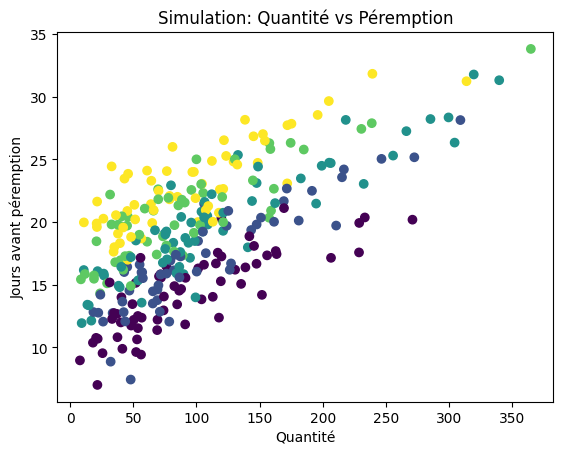

In [5]:
# Simulation d'un jeu de données
np.random.seed(42)
n = 300
quantity = np.random.gamma(2, 50, n)
type_code = np.random.randint(0, 5, n)
expiry_days = 10 + 0.05 * quantity + type_code * 2 + np.random.normal(0, 2, n)
df = pd.DataFrame({'quantity_of_food': quantity, 'type_code': type_code, 'expiry_days': expiry_days})
plt.scatter(df['quantity_of_food'], df['expiry_days'], c=df['type_code'])
plt.xlabel('Quantité')
plt.ylabel('Jours avant péremption')
plt.title('Simulation: Quantité vs Péremption')
plt.show()

## 2. Prétraitement et séparation des données

In [6]:
X = df[['quantity_of_food', 'type_code']].values
y = df['expiry_days'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 3. Construction et entraînement du modèle de régression

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 4. Évaluation du modèle

MAE: 1.86, RMSE: 2.32, R2: 0.80


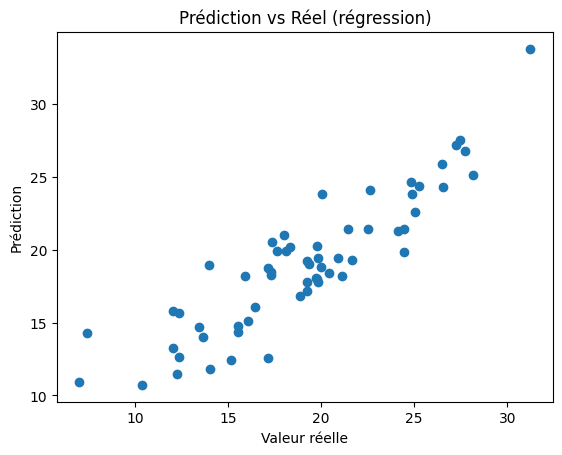

In [8]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}')
plt.scatter(y_test, y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Réel (régression)')
plt.show()

## 5. Sauvegarde du modèle

In [9]:
import joblib
joblib.dump(model, 'expiry_regression_model.pkl')
print('Modèle sauvegardé sous expiry_regression_model.pkl')

Modèle sauvegardé sous expiry_regression_model.pkl
